# Linear Regression

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split #splitting data in to training and testing
from sklearn.metrics import r2_score #to use mean squared error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [8]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Inspection

In [9]:
advertising.shape
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Cleaning

In [10]:
advertising.isnull()


,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


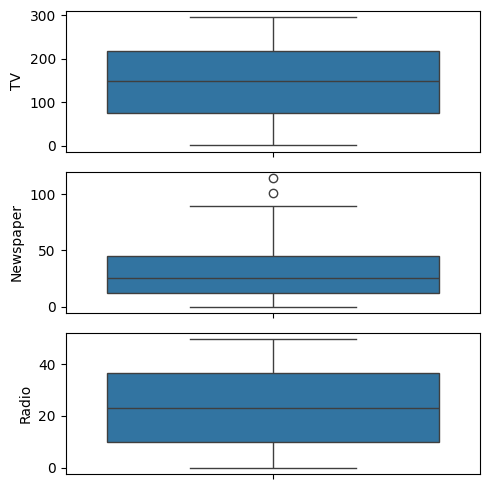

In [11]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()


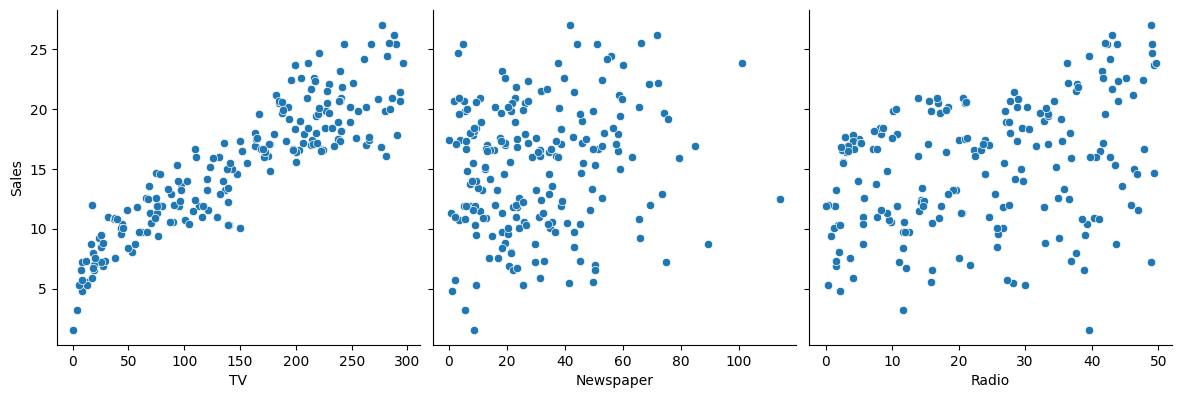

In [12]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

<Axes: >

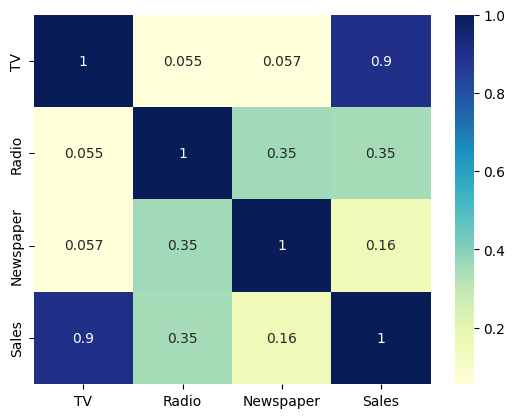

In [13]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)

In [14]:
x=advertising.iloc[:,:3] #selecting up to third column. means 0,1,2 columns
y=advertising.iloc[:,3] #select the third column only and all rows of third column

In [15]:
print(x)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [16]:
x=advertising.iloc[:,:3].values 
y=advertising.iloc[:,3].values

In [17]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [18]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [19]:
train_test_split(x, y, train_size=0.8, test_size=0.2)

[array([[253.8,  21.3,  30. ],
        [175.1,  22.5,  31.5],
        [177. ,   9.3,   6.4],
        [193.2,  18.4,  65.7],
        [206.8,   5.2,  19.4],
        [248.8,  27.1,  22.9],
        [286. ,  13.9,   3.7],
        [240.1,  16.7,  22.9],
        [ 50. ,  11.6,  18.4],
        [ 38. ,  40.3,  11.9],
        [  8.7,  48.9,  75. ],
        [205. ,  45.1,  19.6],
        [210.8,  49.6,  37.7],
        [ 43. ,  25.9,  20.5],
        [217.7,  33.5,  59. ],
        [177. ,  33.4,  38.7],
        [198.9,  49.4,  60. ],
        [237.4,   5.1,  23.5],
        [117.2,  14.7,   5.4],
        [293.6,  27.7,   1.8],
        [104.6,   5.7,  34.4],
        [ 53.5,   2. ,  21.4],
        [ 17.2,  45.9,  69.3],
        [ 26.8,  33. ,  19.3],
        [ 68.4,  44.5,  35.6],
        [191.1,  28.7,  18.2],
        [ 56.2,   5.7,  29.7],
        [ 31.5,  24.6,   2.2],
        [204.1,  32.9,  46. ],
        [241.7,  38. ,  23.2],
        [234.5,   3.4,  84.8],
        [ 23.8,  35.1,  65.9],
        

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
#splitting data in to training and testing

In [21]:
x_train

array([[215.4,  23.6,  57.6],
       [175.7,  15.4,   2.4],
       [164.5,  20.9,  47.4],
       [218.5,   5.4,  27.4],
       [120.2,  19.6,  11.6],
       [ 89.7,   9.9,  35.7],
       [ 16.9,  43.7,  89.4],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [ 38.2,   3.7,  13.8],
       [202.5,  22.3,  31.6],
       [171.3,  39.7,  37.7],
       [ 75.1,  35. ,  52.7],
       [131.1,  42.8,  28.9],
       [210.7,  29.5,   9.3],
       [ 44.5,  39.3,  45.1],
       [ 17.2,   4.1,  31.6],
       [ 25.6,  39. ,   9.3],
       [197.6,  23.3,  14.2],
       [ 85.7,  35.8,  49.3],
       [213.4,  24.6,  13.1],
       [151.5,  41.3,  58.5],
       [205. ,  45.1,  19.6],
       [142.9,  29.3,  12.6],
       [134.3,   4.9,   9.3],
       [ 80.2,   0. ,   9.2],
       [239.8,   4.1,  36.9],
       [ 88.3,  25.5,  73.4],
       [ 19.4,  16. ,  22.3],
       [225.8,   8.2,  56.5],
       [136.2,  19.2,  16.6],
       [ 25.1,  25.7,  43.3],
       [ 38. ,  40.3,  11.9],
       [17

In [22]:
model = LinearRegression() #import linear regression for model

In [23]:
model.fit(x_train, y_train) #fitting the model

LinearRegression()

In [24]:
model.intercept_ #get the intercept

4.419176628968952

In [25]:
model.coef_ #get the coefficient

array([0.05373662, 0.1061416 , 0.00542157])

In [26]:
model.score(x_train, y_train) #get the R squared value

0.9114914479108845

In [27]:
x_pred = model.predict(x_test) #predict the value
y_pred = model.predict(x_test) #predict the value

In [28]:
print(x_pred)
print(y_pred)

[ 9.24156185 20.88863168 16.35932288 19.99325582 21.56647985 16.18902526
 13.55593173 15.44101643 20.68858089 20.87635961 12.30666696 20.5823859
  8.2052026  16.8020073  10.49789975 10.04517517 16.27471961 14.58389375
 17.15124514 12.54217786 18.5255145  12.14739801 20.26906823 17.68550321
 16.70332653 21.47564231 20.03074293 10.79641986 19.02391131 14.77388184
 13.01107071  9.11899998 12.07692797 16.60311172  8.43700724 13.99646169
  9.96423595 14.29142558 16.80210584 17.11029489]
[ 9.24156185 20.88863168 16.35932288 19.99325582 21.56647985 16.18902526
 13.55593173 15.44101643 20.68858089 20.87635961 12.30666696 20.5823859
  8.2052026  16.8020073  10.49789975 10.04517517 16.27471961 14.58389375
 17.15124514 12.54217786 18.5255145  12.14739801 20.26906823 17.68550321
 16.70332653 21.47564231 20.03074293 10.79641986 19.02391131 14.77388184
 13.01107071  9.11899998 12.07692797 16.60311172  8.43700724 13.99646169
  9.96423595 14.29142558 16.80210584 17.11029489]


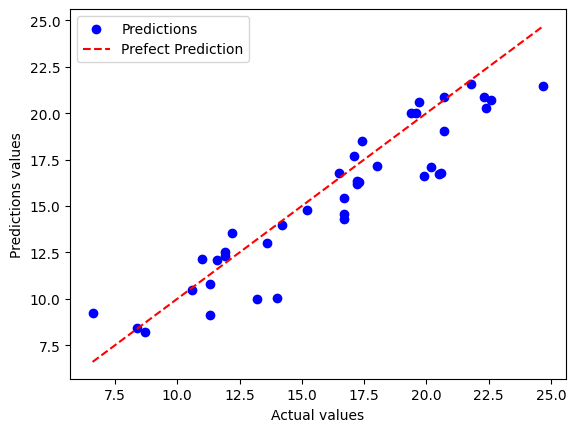

In [29]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prefect Prediction')
plt.xlabel('Actual values')
plt.ylabel('Predictions values')
plt.legend()
plt.show()

In [30]:
residuals = y_test - y_pred 
residuals

array([-2.64156185, -0.18863168,  0.84067712, -0.59325582,  0.23352015,
        1.01097474, -1.35593173,  1.25898357,  1.91141911,  1.42364039,
       -0.40666696, -0.8823859 ,  0.4947974 ,  3.7979927 ,  0.10210025,
        3.95482483,  1.02528039,  2.11610625,  0.84875486, -0.64217786,
       -1.1255145 , -1.14739801,  2.13093177, -0.58550321,  3.79667347,
        3.22435769, -0.43074293,  0.50358014,  1.67608869,  0.42611816,
        0.58892929,  2.18100002, -0.47692797,  3.29688828, -0.03700724,
        0.20353831,  3.23576405,  2.40857442, -0.30210584,  3.08970511])

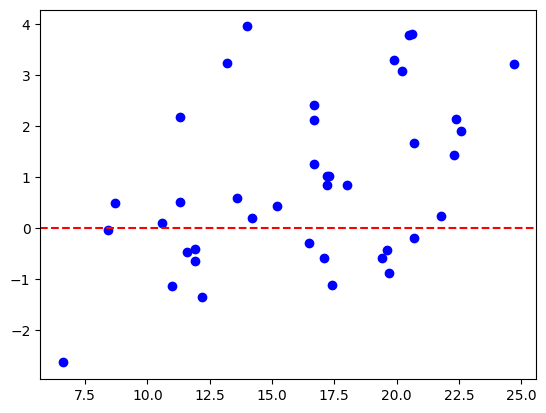

In [31]:
plt.scatter(y_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')

In [32]:
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE)

Mean Squared Error: 3.3509887213291782


# Getting predictions

In [33]:
arr = np.array([230.1, 37.8, 69.2]).reshape(1, 3)
#reshape the array to 1 row and 3 columns
model.predict(arr)

array([21.17129883])

# Using cross validation


In [34]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=100) #splitting data in to 5 iterations

In [35]:
scores = cross_val_score(model, x, y, scoring='r2', cv=kf)
print('Scores:', scores)
print('Mean:', scores.mean())

Scores: [0.82966906 0.88013559 0.84667487 0.91959139 0.90968402]
Mean: 0.877150986678419


# Working with catoganical dataset 

In [94]:
gpadata=pd.read_csv('GPA_data.csv')
gpafp = pd.DataFrame(gpadata)#convert to dataframe
gpadata.head()

,ID,Gender,Age,Extra_Curricular,Study_Hours,Annual_Income,Distance_From_Home,GPA
0,8867,Male,22,Societies,10,1318792,154,1.76
1,1316,Female,24,Societies,9,874657,181,3.88
2,9443,Male,22,Societies,15,1098331,94,1.73
3,1829,Female,25,No,9,1680585,8,1.29
4,1989,Male,26,No,7,1361560,122,3.19


In [95]:
gpafp[['Gender','Extra_Curricular']]

,Gender,Extra_Curricular
0,Male,Societies
1,Female,Societies
2,Male,Societies
3,Female,No
4,Male,No
...,...,...
995,Female,No
996,Male,No
997,Male,Sports
998,Male,Societies


# ================ 1st Methode

In [66]:
pd.get_dummies(gpafp[['Gender','Extra_Curricular']]).astype(int)
#convert the data to integer

,Gender_Female,Gender_Male,Extra_Curricular_No,Extra_Curricular_Societies,Extra_Curricular_Sports
0,0,1,0,1,0
1,1,0,0,1,0
2,0,1,0,1,0
3,1,0,1,0,0
4,0,1,1,0,0
...,...,...,...,...,...
995,1,0,1,0,0
996,0,1,1,0,0
997,0,1,0,0,1
998,0,1,0,1,0


In [ ]:
dumy=pd.get_dummies(gpafp[['Gender', 'Extra_Curricular']], drop_first=True).astype(int)#drop the first column from the data
dumy




,Gender_Male,Extra_Curricular_Societies,Extra_Curricular_Sports
0,1,1,0
1,0,1,0
2,1,1,0
3,0,0,0
4,1,0,0
...,...,...,...
995,0,0,0
996,1,0,0
997,1,0,1
998,1,1,0


In [97]:
#gpafp=gpafp.drop(columns=['ID', 'Gender', 'Extra_Curricular'])
newdata = pd.concat([ dumy,gpafp], axis=1)
newdata

,Gender_Male,Extra_Curricular_Societies,Extra_Curricular_Sports,ID,Gender,Age,Extra_Curricular,Study_Hours,Annual_Income,Distance_From_Home,GPA
0,1,1,0,8867,Male,22,Societies,10,1318792,154,1.76
1,0,1,0,1316,Female,24,Societies,9,874657,181,3.88
2,1,1,0,9443,Male,22,Societies,15,1098331,94,1.73
3,0,0,0,1829,Female,25,No,9,1680585,8,1.29
4,1,0,0,1989,Male,26,No,7,1361560,122,3.19
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,5129,Female,22,No,5,1675219,27,2.32
996,1,0,0,2365,Male,24,No,8,947439,125,2.70
997,1,0,1,5140,Male,26,Sports,6,1912975,67,1.36
998,1,1,0,4976,Male,22,Societies,12,341543,86,1.88


# ================ 2nd Methode

In [96]:
#convert the data to integer
# pd.get_dummies(gpafp[['Gender','Extra_Curricular']]).astype(int)
#drop the first column from the data and join the dataframes
newdataset1 =  pd.get_dummies(gpafp[['Gender', 'Extra_Curricular']], drop_first=True).astype(int).join
(gpafp.drop(columns=['ID', 'Gender', 'Extra_Curricular']))
newdataset1


<bound method DataFrame.join of      Gender_Male  Extra_Curricular_Societies  Extra_Curricular_Sports
0              1                           1                        0
1              0                           1                        0
2              1                           1                        0
3              0                           0                        0
4              1                           0                        0
..           ...                         ...                      ...
995            0                           0                        0
996            1                           0                        0
997            1                           0                        1
998            1                           1                        0
999            1                           0                        0

[1000 rows x 3 columns]>

In [ ]:
y = newdataset1['GPA'] #select the GPA column
